In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read CSV
path1 = os.path.join('Data', 'Unemployment_2010-2011.csv')
path2 = os.path.join('Data', 'Unemployment_2012-2014.csv')
data_one = pd.read_csv(path1)
data_two = pd.read_csv(path2)


In [5]:
data_one.head(1)

,Country Name,Country Code,2010,2011
0,Afghanistan,AFG,20.6,20.9


In [3]:
print(data_one.columns)

Index(['Country Name', 'Country Code', '2010', '2011'], dtype='object')


In [6]:
data_two.head(1)

,Country Name,Country Code,2012,2013,2014
0,Afghanistan,AFG,19.700001,21.1,20.799999


In [4]:
print(data_two.columns)

Index(['Country Name', 'Country Code', '2012', '2013', '2014'], dtype='object')


In [7]:
# Delete one of the 'Country Code' column before merging
del data_two['Country Code']

# Merge our two data frames together
combined_data = pd.merge(data_one, data_two, on="Country Name")
combined_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [8]:
# Set the 'Country Code' to be our index for easy referencing
combined_data = combined_data.set_index("Country Code")

In [11]:
combined_data.head(5)

,Country Name,2010,2011,2012,2013,2014
Country Code,,,,,,
AFG,Afghanistan,20.600000,20.900000,19.700001,21.100000,20.799999
AGO,Angola,10.800000,10.700000,10.700000,10.600000,10.500000
ALB,Albania,25.799999,27.000000,28.299999,28.700001,29.200001
ARB,Arab World,25.022214,28.117516,29.113212,29.335306,29.704569
ARE,United Arab Emirates,9.800000,9.800000,9.800000,9.900000,10.000000


In [10]:
# Collect the mean unemployment rates for the world
average_unemployment = combined_data.mean()
print(average_unemployment)

2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64


In [13]:
type(average_unemployment)

pandas.core.series.Series

In [12]:
# Collect the years where data was collected
years = average_unemployment.keys()
years

Index(['2010', '2011', '2012', '2013', '2014'], dtype='object')

In [14]:
# Plot the world average as a line chart
result = plt.plot(years, average_unemployment, 
                       color="red",result = plt.plot(years, average_unemployment, 
                       color="red", label="World Average" )
 label="World Average" )
print(result)

In [17]:
len(result)

1

In [15]:
type(result)

list

In [16]:
world_avg = result[0]
world_avg

Why [plot returns a list](https://matplotlib.org/1.3.1/users/pyplot_tutorial.html):



Use the setter methods of the Line2D instance. plot returns a list of lines; eg line1, line2 = plot(x1,y1,x2,y2). Below I have only one line so it is a list of length 1. I use tuple unpacking in the line, = plot(x, y, 'o') to get the first element of the list:

In [18]:
type(world_avg)

matplotlib.lines.Line2D

In [19]:
combined_data.head(1)

,Country Name,2010,2011,2012,2013,2014
Country Code,,,,,,
AFG,Afghanistan,20.6,20.9,19.700001,21.1,20.799999


In [20]:
# Get USA data
columns_to_plot = ["2010","2011","2012","2013","2014"]
data_usa = combined_data.loc['USA', columns_to_plot]
print(data_usa)

2010    18.7
2011    17.4
2012    16.5
2013    15.8
2014      14
Name: USA, dtype: object


In [21]:
country_name = combined_data.loc['USA', 'Country Name']
country_name

'United States'

In [22]:
# Plot the unemployment values for a single country
result = plt.plot(years, data_usa, color="green", label=country_name)
country_one = result[0]

In [ ]:
#another way to do this
country_one = plt.plot(years, 
                       data_usa, 
                       color="green", 
                       label=country_name)[0]

In [13]:
#yet another way...
country_one, = plt.plot(years, 
                       data_usa, 
                       color="green", 
                       label=country_name)

In [23]:
world_avg

In [24]:
country_one

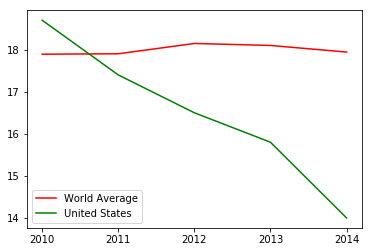

In [25]:
# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

In [35]:
type(years)

pandas.core.indexes.base.Index

In [36]:
years

Index(['2010', '2011', '2012', '2013', '2014'], dtype='object')

In [38]:
type(average_unemployment)

pandas.core.series.Series

In [37]:
average_unemployment

2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64

In [39]:
data_usa

2010    18.7
2011    17.4
2012    16.5
2013    15.8
2014      14
Name: USA, dtype: object

In [40]:
type(data_usa)

pandas.core.series.Series

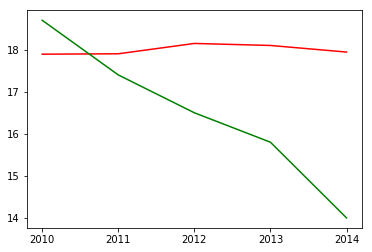

In [26]:
world_avg, = plt.plot(years, average_unemployment, 
                       color="red", label="World Average" )

country_one, = plt.plot(years, 
                       data_usa, 
                       color="green", 
                       label=country_name)
plt.show()

In [28]:
type(average_unemployment)

pandas.core.series.Series

In [29]:
# Plot the world average as a line chart
axis_object = average_unemployment.plot(kind='line', 
                                        label='World Average',
                                        legend=True, 
                                        color="red")


In [30]:
type(axis_object)

matplotlib.axes._subplots.AxesSubplot

In [31]:
# Plot the unemployment values for a single country
columns_to_plot = ["2010","2011","2012","2013","2014"]
data_usa = combined_data.loc['USA', columns_to_plot]
country_name = combined_data.loc['USA', 'Country Name']


In [33]:
type(data_usa)

pandas.core.series.Series

In [32]:
data_usa

2010    18.7
2011    17.4
2012    16.5
2013    15.8
2014      14
Name: USA, dtype: object

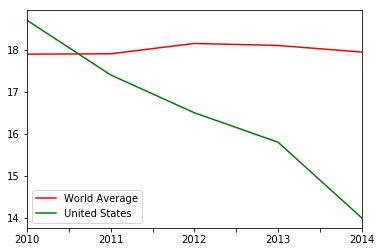

In [34]:
data_usa.plot(kind='line', 
              label=country_name, 
              ax=axis_object, 
              legend=True,
              color="green")

plt.show()